In [66]:
print('Started..')

Started..


## Imports

In [3]:
## ------ Imports ------
import pandas as pd
import matplotlib as mp 
import numpy as np
import tensorflow as tf 
import keras as ks
import csv
import random
import math
from itertools import islice
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

## Human Observed Dataset

In [ ]:
# --------------------------------------- Human Observed Dataset ----------------------------------------------
# ------ Feature Data ------
Loc_hum_fea_data = r'../HumanObserved-Dataset/HumanObserved-Features-Data/HumanObserved-Features-Data.csv'

# ------ Same Pairs ------
Loc_hum_fea_same = r'../HumanObserved-Dataset/HumanObserved-Features-Data/same_pairs.csv'

# ------ Diff Pairs ------
Loc_hum_fea_diffn = r'../HumanObserved-Dataset/HumanObserved-Features-Data/diffn_pairs.csv'

# ------ Read csv files ------
df_hum_fea_data_A = pd.read_csv(Loc_hum_fea_data, names=['img_id_A','fA1','fA2','fA3','fA4','fA5','fA6','fA7','fA8','fA9'])
df_hum_fea_data_A.drop(df_hum_fea_data_A.index[0], inplace=True)

df_hum_fea_data_B = pd.read_csv(Loc_hum_fea_data, names=['img_id_B','fB1','fB2','fB3','fB4','fB5','fB6','fB7','fB8','fB9'])
df_hum_fea_data_B.drop(df_hum_fea_data_B.index[0], inplace=True)

# ----------------------------- Concat Pairs ----------------------------- 
# -- Same Pairs -- 
df_same_pair = pd.read_csv(Loc_hum_fea_same)
df_hum_fea_same_pair_A = pd.merge(df_same_pair,df_hum_fea_data_A,on='img_id_A')
df_hum_fea_same_pair_A_plus_B = pd.merge(df_hum_fea_same_pair_A,df_hum_fea_data_B,on='img_id_B') 
df_hum_fea_same_pair_A_plus_B = df_hum_fea_same_pair_A_plus_B[['img_id_A','img_id_B','fA1','fA2','fA3','fA4','fA5','fA6','fA7','fA8','fA9','fB1','fB2','fB3','fB4','fB5','fB6','fB7','fB8','fB9','target']]

# -- Diff Pairs -- 
df_diffn_pair = pd.read_csv(Loc_hum_fea_diffn)
df_hum_fea_diff_pair_A = pd.merge(df_diffn_pair,df_hum_fea_data_A,on='img_id_A')
df_hum_fea_diff_pair_A_plus_B = pd.merge(df_hum_fea_diff_pair_A,df_hum_fea_data_B,on='img_id_B')
df_hum_fea_diff_pair_A_plus_B = df_hum_fea_diff_pair_A_plus_B[['img_id_A','img_id_B','fA1','fA2','fA3','fA4','fA5','fA6','fA7','fA8','fA9','fB1','fB2','fB3','fB4','fB5','fB6','fB7','fB8','fB9','target']]

frames_concat = [df_hum_fea_same_pair_A_plus_B,df_hum_fea_diff_pair_A_plus_B]
df_hum_fea_concatd_data_set = pd.concat(frames_concat)
df_hum_fea_concatd_data_set.to_csv('human_fea_concat.csv',index=False)

# ----------------------------- Substract Pairs ---------------------------

main_sub = df_hum_fea_concatd_data_set.iloc[:,0:2]

subset_1 = df_hum_fea_concatd_data_set.iloc[:,2:11]
sub1_ty = subset_1.astype('int64', copy=False)
sub1_ty.columns = sub1_ty.columns.str.replace('fA','f')

subset_2 = df_hum_fea_concatd_data_set.iloc[:,11:20]
sub2_ty = subset_2.astype('int64',copy=False)
sub2_ty.columns = sub2_ty.columns.str.replace('fB','f')

substract_sub = abs(sub1_ty.iloc[:,0:] - sub2_ty.iloc[:,0:])
substract_sub = substract_sub.astype('object',copy=False)

target_sub = df_hum_fea_concatd_data_set.iloc[:,20]

frames_sub = [main_sub,target_sub,substract_sub]
df_hum_fea_sub_data_set = pd.concat(frames_sub,ignore_index=False,axis=1)
df_hum_fea_sub_data_set.to_csv('human_fea_sub.csv',index=False)
# < TODO :: Write to File>

## GSC Observed Data

In [23]:
# ---------------------------------------------- GSC Observed Data --------------------------------------------
# ------ Feature Data ------
Loc_gsc_fea_data = r'../GSC-Dataset/GSC-Features-Data/GSC-Features.csv'

# ------ Same Pairs ------
Loc_gsc_fea_same = r'../GSC-Dataset/GSC-Features-Data/same_pairs.csv'

# ------ diffn Pairs ------
Loc_gsc_fea_diffn = r'../GSC-Dataset/GSC-Features-Data/diffn_pairs.csv'

# ------ Read csv Files ------
df_gsc_fea_data = pd.read_csv(Loc_gsc_fea_data)
df_gsc_fea_data_A = df_gsc_fea_data.rename(columns = {'img_id':'img_id_A'})
df_gsc_fea_data_A.columns = df_gsc_fea_data_A.columns.str.replace('f','fA')
df_gsc_fea_data_B = df_gsc_fea_data.rename(columns = {'img_id':'img_id_B'})
df_gsc_fea_data_B.columns = df_gsc_fea_data_B.columns.str.replace('f','fB')

# ----------------------------- Concat Pairs ----------------------------- 
# -- Same Pairs --
df_gsc_same_pair = pd.read_csv(Loc_gsc_fea_same)
df_gsc_fea_same_pair_A = pd.merge(df_gsc_same_pair,df_gsc_fea_data_A,on='img_id_A')
df_gsc_fea_same_pair_A_plus_B = pd.merge(df_gsc_fea_same_pair_A,df_gsc_fea_data_B,on='img_id_B')

# -- Diff Pairs --
df_gsc_diff_pair = pd.read_csv(Loc_gsc_fea_diffn)
df_gsc_fea_diff_pair_A = pd.merge(df_gsc_diff_pair,df_gsc_fea_data_A,on='img_id_A')
df_gsc_fea_diff_pair_A_plus_B = pd.merge(df_gsc_fea_diff_pair_A,df_gsc_fea_data_B,on='img_id_B')

frames_gsc = [df_gsc_fea_same_pair_A_plus_B,df_gsc_fea_diff_pair_A_plus_B]
df_gsc_fea_concatd_data_set = pd.concat(frames_gsc)
df_gsc_fea_concatd_data_set.to_csv('gsc_fea_concat.csv',index=False)


# ----------------------------- Substract Pairs ---------------------------
# <TODO>
main_gsc_fea_sub = df_gsc_fea_concatd_data_set.iloc[:,0:2]
#print(main_gsc_fea_sub)

sub_1 = df_gsc_fea_concatd_data_set.iloc[:,3:515]
sub1_ty_gsc = sub_1.astype('int64',copy=False)
sub1_ty_gsc.columns = sub1_ty_gsc.columns.str.replace('fA','f')

sub_2 = df_gsc_fea_concatd_data_set.iloc[:,515:]
sub2_ty_gsc = sub_2.astype('int64',copy=False)
sub2_ty_gsc.columns = sub2_ty_gsc.columns.str.replace('fB','f')

substract_sub_gsc = abs(sub1_ty_gsc.iloc[:,0:] - sub2_ty_gsc.iloc[:,0:])
substract_sub_gsc = substract_sub_gsc.astype('object',copy=False)

target_sub_gsc = df_gsc_fea_concatd_data_set.iloc[:,2]

frames_gsc_sub = [main_gsc_fea_sub,target_sub_gsc,substract_sub_gsc]

df_gsc_fea_sub_data_set = pd.concat(frames_gsc_sub,ignore_index=False,axis=1)
df_gsc_fea_sub_data_set.to_csv('gsc_fea_sub.csv',index=False)

In [68]:
print('Done .csv Processing!!')

Done!!


## Prepare Data Subset

In [24]:
# ---- Human Observed Subset ----

# ---- Concat ----
target_0_hum = df_hum_fea_concatd_data_set.loc[df_hum_fea_concatd_data_set['target'] == 0]
hum_target_split_df_0 = target_0_hum.loc[0:807,:]

target_1_hum = df_hum_fea_concatd_data_set.loc[df_hum_fea_concatd_data_set['target'] == 1]
hum_target_split_df_1 =target_1_hum.loc[0:791,:]

frames_split_merged_hum = [hum_target_split_df_0,hum_target_split_df_1]
hum_target_split_merged = pd.concat(frames_split_merged_hum)
hum_target_split_merged = shuffle(hum_target_split_merged)
hum_target_split_merged.shape

hum_target_split_merged.to_csv('hum_fea_concat_subset.csv',index=False)

# ---- Substract ----
target_0_hum_sub = df_hum_fea_sub_data_set.loc[df_hum_fea_sub_data_set['target'] == 0]
hum_target_split_df_subtract_0 = target_0_hum_sub.loc[0:807,:]

target_1_hum_sub = df_hum_fea_sub_data_set.loc[df_hum_fea_sub_data_set['target'] == 1]
hum_target_split_df_subtract_1 = target_1_hum_sub.loc[0:807,:]

frames_split_merged_subtract_hum = [hum_target_split_df_subtract_0,hum_target_split_df_subtract_1]
hum_target_split_merged_subtract = pd.concat(frames_split_merged_subtract_hum)
hum_target_split_merged_subtract = shuffle(hum_target_split_merged_subtract)
hum_target_split_merged_subtract.to_csv('hum_fea_subtract_subset.csv',index=False)

NameError: name 'df_hum_fea_concatd_data_set' is not defined

In [42]:
# ---- GSC Observed Subset ----

# ---- Concat ----
target_0_gsc = df_gsc_fea_concatd_data_set.loc[df_gsc_fea_concatd_data_set['target'] == 0]
gsc_target_split_df_0 = target_0_gsc.loc[0:10000,:]

target_1_gsc = df_gsc_fea_concatd_data_set.loc[df_gsc_fea_concatd_data_set['target'] == 1]
gsc_target_split_df_1 =target_1_gsc.loc[0:10000,:]

frames_split_merged_gsc = [gsc_target_split_df_0,gsc_target_split_df_1]
gsc_target_split_merged = pd.concat(frames_split_merged_gsc)
gsc_target_split_merged = shuffle(gsc_target_split_merged)
gsc_target_split_merged.to_csv('gsc_fea_concat_subset.csv',index=False)

# ---- Substract ----
target_0_gsc_sub = df_gsc_fea_sub_data_set.loc[df_gsc_fea_sub_data_set['target'] == 0]
gsc_target_split_df_subtract_0 = target_0_gsc_sub.loc[0:10000,:]

target_1_gsc_sub = df_gsc_fea_sub_data_set.loc[df_gsc_fea_sub_data_set['target'] == 1]
gsc_target_split_df_subtract_1 = target_1_gsc_sub.loc[0:10000,:]

frames_split_merged_subtract_gsc = [gsc_target_split_df_subtract_0,gsc_target_split_df_subtract_1]
gsc_target_split_merged_subtract = pd.concat(frames_split_merged_subtract_gsc)
gsc_target_split_merged_subtract = shuffle(gsc_target_split_merged_subtract)
gsc_target_split_merged_subtract.to_csv('gsc_fea_subtract_subset.csv',index=False)

(20002, 1027)


In [43]:
df1 = pd.read_csv('gsc_fea_concat_subset.csv')
df2 = pd.read_csv('gsc_fea_subtract_subset.csv')
print(df1.head)
print(df2.head)


<bound method NDFrame.head of              img_id_A         img_id_B  target  fA1  fA2  fA3  fA4  fA5  fA6  \
0      0010b_num1.png   0042c_num2.png       0    0    0    0    0    0    0   
1      0007a_num2.png   0048c_num5.png       0    0    0    0    0    0    0   
2      0003a_num1.png   0008c_num4.png       0    0    0    0    0    0    0   
3      0091b_num2.png   0091c_num1.png       1    0    0    0    0    0    0   
4      0200c_num3.png   0200c_num7.png       1    0    0    0    0    0    0   
5      0149a_num4.png   0149c_num1.png       1    0    0    0    0    0    0   
6      0094a_num4.png   0094a_num6.png       1    0    0    0    0    0    0   
7      0038a_num1.png  0042bb_num2.png       0    0    0    0    0    0    0   
8      0038a_num5.png   0038b_num4.png       1    0    0    0    0    0    0   
9      0019a_num1.png   0041b_num4.png       0    0    0    0    0    0    0   
10     0125a_num3.png   0125b_num1.png       1    1    1    1    0    0    0   
11     001

## Linear Reg

In [44]:
def GetTarget(filePath):
    t = []
    with open(filePath, 'rU') as f:
        next(f)
        reader = csv.reader(f)
        for row in reader:  
            t.append(float(row[2]))
        #print("Raw Training Generated..")
    
    return t
def GetRawData(filePath):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        next(fi)
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row[3:]:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    
    
    #dataMatrix = np.delete(dataMatrix, [0,1,2], axis=1)
    dataMatrix = np.transpose(dataMatrix)     
    
    
    return dataMatrix



In [45]:
def GenerateTrainingTarget(rawTraining,TrainingPercent):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    #From the beginning to the calculated training length
    t           = rawTraining[:TrainingLen]
   # print(str(TrainingPercent) + "% Training Target Generated..")
    return t


#Generating training data from whole dataset by restricting the length of the  training dataset to be only 80% of whole raw dataset.
def GenerateTrainingDataMatrix(rawData, TrainingPercent):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
   # print(str(TrainingPercent) + "% Training Data Generated..")
    return d2


#Generating validation/testing target from raw target by restricting the length of the validation/testing target to be only 10% of whole raw target.
def GenerateTargetData(rawData,ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

#Generating validation/testing data from whole dataset by restricting the length of the validation/testing dataset to only 10% of whole dataset
def GenerateTargetVector(rawData,ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t

In [46]:
def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]
#     if IsSynthetic == True:
#         BigSigma = np.dot(3,BigSigma)
#     else:
    BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.pinv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.pinv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

In [47]:
# ------ Human Observed Data ------

#RawTarget
rawConcatenatedTarget = GetTarget('gsc_fea_concat_subset.csv')
rawSubtractedTarget = GetTarget('gsc_fea_subtract_subset.csv')

#RawData
rawConcatenatedData=GetRawData('gsc_fea_concat_subset.csv')
rawSubtractedData=GetRawData('gsc_fea_subtract_subset.csv')

#splitting the data
TrainingPercent=80;
ValidationPercent=10;
TestPercent=10;

ConcatenatedTrainingTarget = np.array(GenerateTrainingTarget(rawConcatenatedTarget,TrainingPercent))
ConcatenatedTrainingDataMatrix   = GenerateTrainingDataMatrix(rawConcatenatedData,TrainingPercent)
print(ConcatenatedTrainingTarget.shape)
print(ConcatenatedTrainingDataMatrix.shape)

ConcatenatedValidationTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,ValidationPercent, (len(ConcatenatedTrainingTarget))))
ConcatenatedValidationDataMatrix    = GenerateTargetData(rawConcatenatedData,ValidationPercent, (len(ConcatenatedTrainingTarget)))
print(ConcatenatedValidationTarget.shape)
print(ConcatenatedValidationDataMatrix.shape)

ConcatenatedTestingTarget = np.array(GenerateTargetVector(rawConcatenatedTarget,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget))))
ConcatenatedTestingDataMatrix = GenerateTargetData(rawConcatenatedData,TestPercent, (len(ConcatenatedTrainingTarget)+len(ConcatenatedValidationTarget)))
print(ConcatenatedTestingTarget.shape)
print(ConcatenatedTestingDataMatrix.shape)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 'U' mode is deprecated
  del sys.path[0]


(16002,)
(1024, 16002)
(2000,)
(1024, 2000)
(1999,)
(1024, 1999)


## Linear Regression :: Concat GSC Features

In [48]:
maxAcc = 0.0
maxIter = 0
TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
M = 10
PHI = []
ErmsArr = []
AccuracyArr = []
La           = 2
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

W       = tf.Variable(tf.random_normal([M,],stddev=0.01))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
W_Now = W.eval(sess)

kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(ConcatenatedTrainingDataMatrix))
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(rawConcatenatedData, Mu, TrainingPercent)
TRAINING_PHI = GetPhiMatrix(rawConcatenatedData, Mu, BigSigma, TrainingPercent)
TEST_PHI     = GetPhiMatrix(ConcatenatedTestingDataMatrix, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ConcatenatedValidationDataMatrix, Mu, BigSigma, 100)

for i in range(0,100):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((ConcatenatedTrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
   # print(TR_TEST_OUT)
    Erms_TR       = GetErms(TR_TEST_OUT,ConcatenatedTrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ConcatenatedValidationTarget)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,ConcatenatedTestingTarget)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    
print ('----------Gradient Descent Solution--------------------')

print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))



----------Gradient Descent Solution--------------------
E_rms Training   = 0.69643
E_rms Validation = 0.69271
E_rms Testing    = 0.70112


## Linear Regression :: Subtracted GSC Features

In [49]:
#subtracted dataset

SubtractedTrainingTarget = np.array(GenerateTrainingTarget(rawSubtractedTarget,TrainingPercent))
SubtractedTrainingDataMatrix   = GenerateTrainingDataMatrix(rawSubtractedData,TrainingPercent)
SubtractedValidationTarget = np.array(GenerateTargetVector(rawSubtractedTarget,ValidationPercent, (len(SubtractedTrainingTarget))))
SubtractedValidationDataMatrix    = GenerateTargetData(rawSubtractedData,ValidationPercent, (len(SubtractedTrainingTarget)))
SubtractedTestingTarget = np.array(GenerateTargetVector(rawSubtractedTarget,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget))))
SubtractedTestingDataMatrix = GenerateTargetData(rawSubtractedData,TestPercent, (len(SubtractedTrainingTarget)+len(SubtractedValidationTarget)))

print(SubtractedTrainingDataMatrix.shape)
print(SubtractedTrainingTarget.shape)
print(SubtractedValidationDataMatrix.shape)
print(SubtractedValidationTarget.shape)

(512, 16002)
(16002,)
(512, 2000)
(2000,)


In [50]:
#subtracted linear regression

maxAcc = 0.0
maxIter = 0


M = 10
PHI = []
ErmsArr = []
AccuracyArr = []
La           = 2
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10

kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(SubtractedTrainingDataMatrix))
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(rawSubtractedData, Mu, TrainingPercent)
TRAINING_PHI = GetPhiMatrix(rawSubtractedData, Mu, BigSigma, TrainingPercent)
TEST_PHI     = GetPhiMatrix(SubtractedTestingDataMatrix, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(SubtractedValidationDataMatrix, Mu, BigSigma, 100)


for i in range(0,100):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((SubtractedTrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
   # print(TR_TEST_OUT)
    Erms_TR       = GetErms(TR_TEST_OUT,SubtractedTrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,SubtractedValidationTarget)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,SubtractedTestingTarget)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    
print ('----------Gradient Descent Solution for subtracted linear--------------------')

print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for subtracted linear--------------------
E_rms Training   = 0.61553
E_rms Validation = 0.61999
E_rms Testing    = 0.6161


## GSC Features [Reference]

In [51]:
# ------ Concat ------
#ConcatenatedTrainingTarget
#ConcatenatedTrainingDataMatrix
#ConcatenatedValidationTarget
#ConcatenatedValidationDataMatrix
#ConcatenatedTestingTarget
#ConcatenatedTestingDataMatrix

# ------ Subtract ------

#SubtractedTrainingTarget
#SubtractedTrainingDataMatrix
#SubtractedValidationTarget
#SubtractedValidationDataMatrix
#SubtractedTestingTarget
#SubtractedTestingDataMatrix

## Logistic Regression 

In [52]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(loss)
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()




## Log Regre :: GSC Fea Concat

In [53]:
log_model = LogisticRegression(lr=0.001, num_iter=10000)
log_model.fit(ConcatenatedTrainingDataMatrix.transpose(), ConcatenatedTrainingTarget)

# Validation Data Prediction
prediction = log_model.predict(ConcatenatedValidationDataMatrix.transpose())
p_concat_val = (prediction == ConcatenatedValidationDataMatrix).mean()

# Testing Data Prediction
prediction = log_model.predict(ConcatenatedTestingDataMatrix.transpose())
p_concat_test = (prediction == ConcatenatedTestingDataMatrix).mean()

print(p_concat_val)
print(p_concat_test)

0.52771435546875
0.520335362993997


## Log Regression :: GSC Fea Subtract

In [54]:
log_model = LogisticRegression(lr=0.001, num_iter=10000)
log_model.fit(SubtractedTrainingDataMatrix.transpose(), SubtractedTrainingTarget)

# Validation Data Prediction
prediction = log_model.predict(SubtractedValidationDataMatrix.transpose())
p_sub_val = (prediction == SubtractedValidationDataMatrix).mean()

# Testing Data Prediction
prediction = log_model.predict(SubtractedTestingDataMatrix.transpose())
p_sub_test = (prediction == SubtractedTestingDataMatrix).mean()

print(p_sub_val)
print(p_sub_test)

0.5174775390625
0.5179777388694348


In [55]:
# ------ Concat ------
#ConcatenatedTrainingTarget
#ConcatenatedTrainingDataMatrix
#ConcatenatedValidationTarget
#ConcatenatedValidationDataMatrix
#ConcatenatedTestingTarget
#ConcatenatedTestingDataMatrix

# ------ Subtract ------

#SubtractedTrainingTarget
#SubtractedTrainingDataMatrix
#SubtractedValidationTarget
#SubtractedValidationDataMatrix
#SubtractedTestingTarget
#SubtractedTestingDataMatrix

## Neural Networks :: GSC Features Concat

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 1024
drop_out = 0.2
first_dense_layer_nodes  = 2048
second_dense_layer_nodes = 2

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


# In[100]:

In [57]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
activation_3 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 4098      
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 2,103,298
Trainable params: 2,103,298
Non-trainable params: 0
_________________________________________________________________


In [58]:
# In[101]:


validation_data_split = 0.2 # the ratio the validation size to total traing size
num_epochs = 10000
model_batch_size = 128 #the minibatch size that we are using the mini batch gradient decent.
tb_batch_size = 32
early_patience = 100 
"""the numer of epochs after which the traing hs to be stopped if the Accuracy doesn't improve"""  

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

from keras.utils import np_utils
Y_train = np_utils.to_categorical(ConcatenatedTrainingTarget, 2)


# In[102]:


history = model.fit(ConcatenatedTrainingDataMatrix.transpose()
                    , Y_train
                    , validation_split=validation_data_split
                    , epochs=10
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )


Train on 12801 samples, validate on 3201 samples
Epoch 1/10
12801/12801 [==============================] - 2s 145us/step - loss: 0.8627 - acc: 0.7834 - val_loss: 0.1969 - val_acc: 0.9378
Epoch 2/10
12801/12801 [==============================] - 2s 132us/step - loss: 0.1486 - acc: 0.9515 - val_loss: 0.1674 - val_acc: 0.9253
Epoch 3/10
12801/12801 [==============================] - 2s 130us/step - loss: 0.1023 - acc: 0.9645 - val_loss: 0.0615 - val_acc: 0.9791
Epoch 4/10
12801/12801 [==============================] - 2s 129us/step - loss: 0.0679 - acc: 0.9784 - val_loss: 0.0709 - val_acc: 0.9791
Epoch 5/10
12801/12801 [==============================] - 2s 138us/step - loss: 0.0594 - acc: 0.9810 - val_loss: 0.0594 - val_acc: 0.9825
Epoch 6/10
12801/12801 [==============================] - 2s 138us/step - loss: 0.0604 - acc: 0.9809 - val_loss: 0.0861 - val_acc: 0.9816
Epoch 7/10
12801/12801 [==============================] - 2s 133us/step - loss: 0.0379 - acc: 0.9870 - val_loss: 0.0774 - v

In [59]:
ConcatenatedTrainingDataMatrix.transpose().shape

(16002, 1024)

In [60]:
ConcatenatedTrainingDataMatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c593d9160>,
      dtype=object)

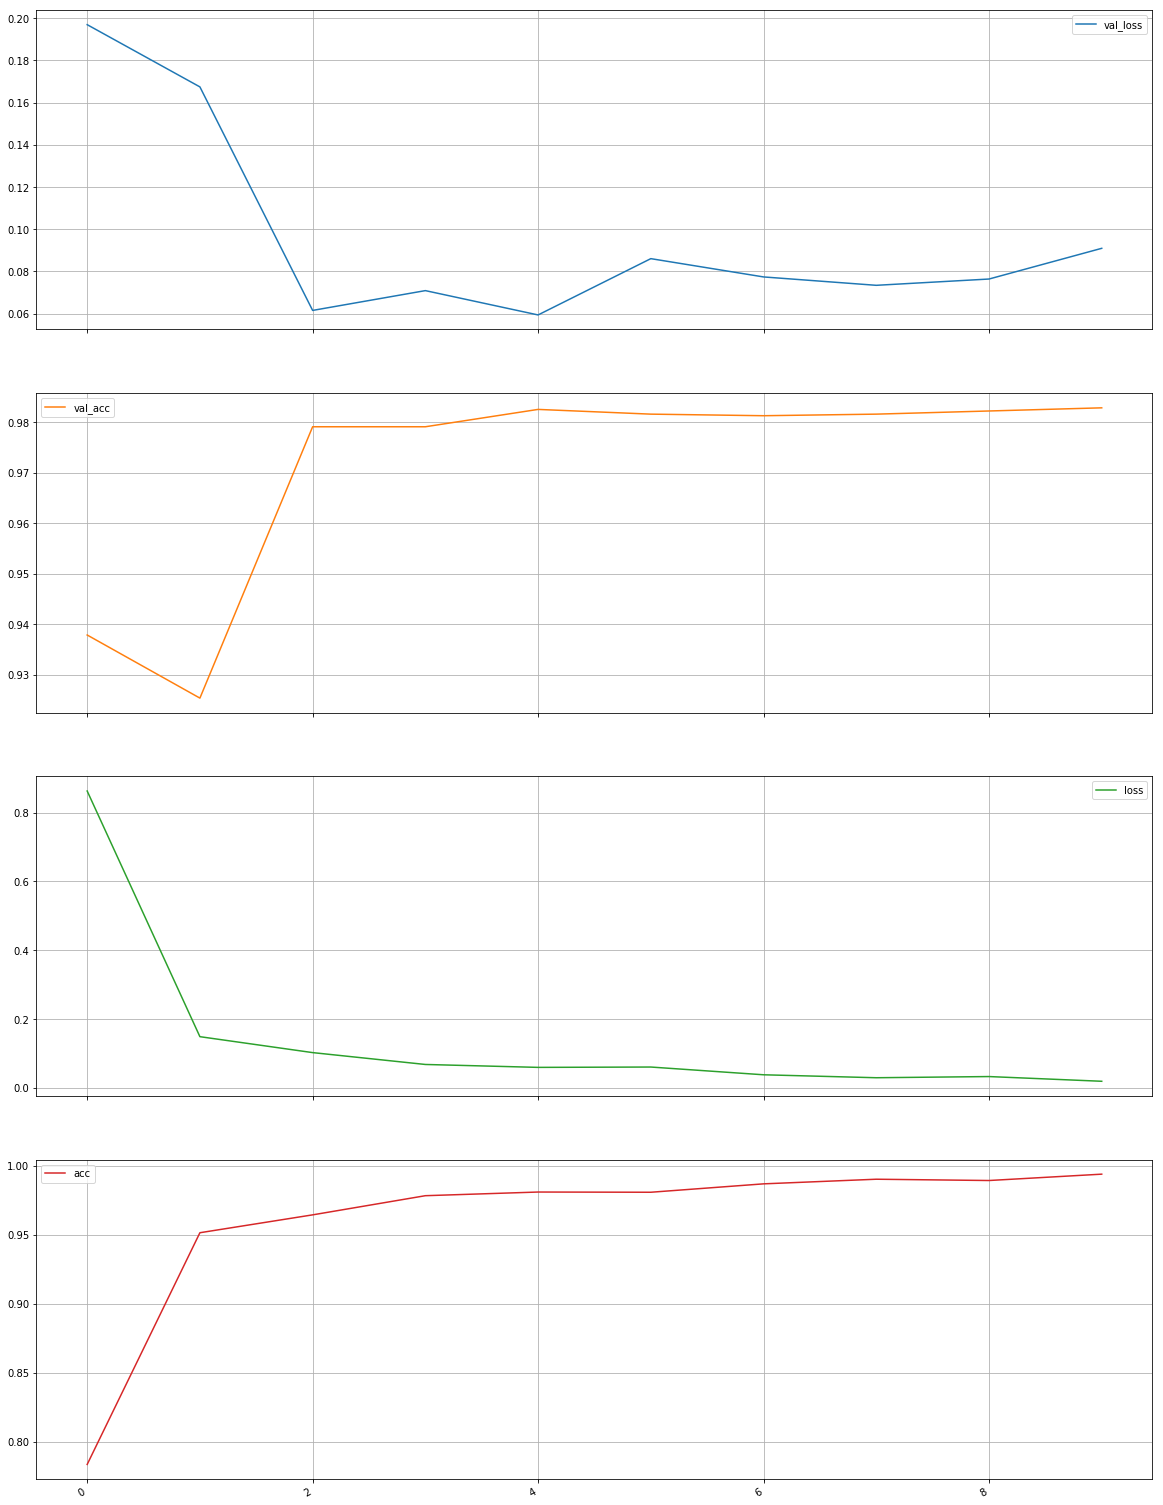

In [61]:
get_ipython().run_line_magic('matplotlib', 'inline')
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(20,30))

## Neural Networks :: GSC Features Subtract 

In [62]:
# In[105]:


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 512
drop_out = 0.2
first_dense_layer_nodes  = 2048
second_dense_layer_nodes = 2

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



In [63]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2048)              1050624   
_________________________________________________________________
activation_5 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4098      
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 1,054,722
Trainable params: 1,054,722
Non-trainable params: 0
_________________________________________________________________


In [64]:
validation_data_split = 0.2 # the ratio the validation size to total traing size
num_epochs = 10000
model_batch_size = 128 #the minibatch size that we are using the mini batch gradient decent.
tb_batch_size = 32
early_patience = 100 
"""the numer of epochs after which the traing hs to be stopped if the Accuracy doesn't improve"""  

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

from keras.utils import np_utils
Y_train = np_utils.to_categorical(SubtractedTrainingTarget, 2)


# In[108]:


history = model.fit(SubtractedTrainingDataMatrix.transpose()
                    , Y_train
                    , validation_split=validation_data_split
                    , epochs=10
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 12801 samples, validate on 3201 samples
Epoch 1/10
12801/12801 [==============================] - 1s 90us/step - loss: 0.5109 - acc: 0.7742 - val_loss: 0.2903 - val_acc: 0.8775
Epoch 2/10
12801/12801 [==============================] - 1s 75us/step - loss: 0.2714 - acc: 0.8872 - val_loss: 0.1880 - val_acc: 0.9269
Epoch 3/10
12801/12801 [==============================] - 1s 75us/step - loss: 0.1909 - acc: 0.9243 - val_loss: 0.8286 - val_acc: 0.6845
Epoch 4/10
12801/12801 [==============================] - 1s 75us/step - loss: 0.1152 - acc: 0.9557 - val_loss: 0.1604 - val_acc: 0.9319
Epoch 5/10
12801/12801 [==============================] - 1s 75us/step - loss: 0.0770 - acc: 0.9752 - val_loss: 0.1214 - val_acc: 0.9531
Epoch 6/10
12801/12801 [==============================] - 1s 77us/step - loss: 0.0658 - acc: 0.9807 - val_loss: 0.0978 - val_acc: 0.9613
Epoch 7/10
12801/12801 [==============================] - 1s 80us/step - loss: 0.0433 - acc: 0.9870 - val_loss: 0.1070 - val_acc:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c5612f470>,
      dtype=object)

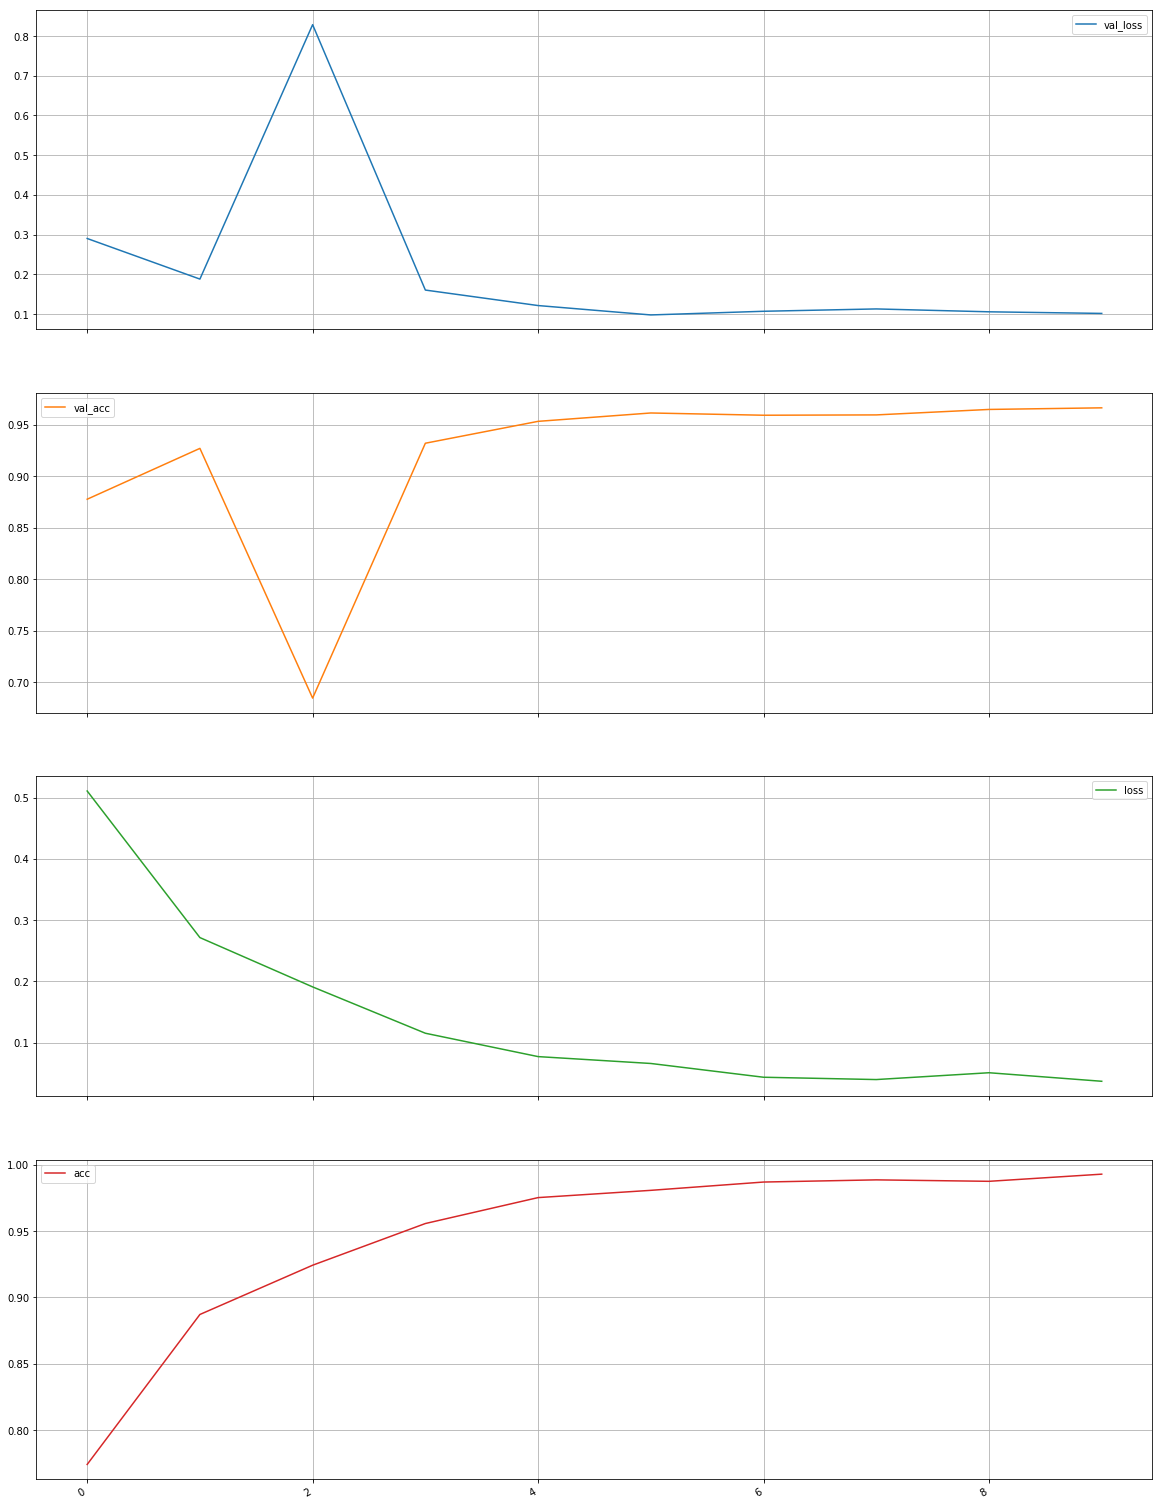

In [65]:
get_ipython().run_line_magic('matplotlib', 'inline')
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(20,30))